In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets 
import pandas as pd# to convert into a data frame
import numpy as np # to convert any column in nD array
from sklearn.metrics import accuracy_score


In [2]:
wine = datasets.load_wine()

In [3]:
X = pd.DataFrame(wine.data)
X.columns =  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

In [1]:
y = pd.DataFrame(wine.target)
y.columns = ['Targets']
print((y.columns.ndim))

NameError: name 'pd' is not defined

In [5]:
#we are building the model 
kmeans = KMeans(n_clusters =3)
clusters = kmeans.fit_predict(X)


In [6]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
print(len(labels))
print(clusters)

178
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


In [7]:
for i in range(3):
    #print(clusters)
    #print(clusters,i)
    cat = (clusters == i)
    print(cat)

[False False False False  True False False False False False False False
 False False False False False False False  True  True  True False False
  True  True False False  True False False False False False False  True
  True False False  True  True False False  True  True False False False
 False False False False False False False False False False False False
  True False  True False False  True False False  True  True  True False
 False False  True False False False  True False False  True  True False
 False False False False  True  True False False False False False  True
  True False  True False  True False False False  True False False False
 False  True False False  True False False False False False False False
  True False False False False False False False False False  True False
 False  True  True  True  True False False False  True  True False False
  True  True False  True  True False False False False  True  True  True
 False  True  True  True False  True False  True  T

Accuracy =  0.702247191011236


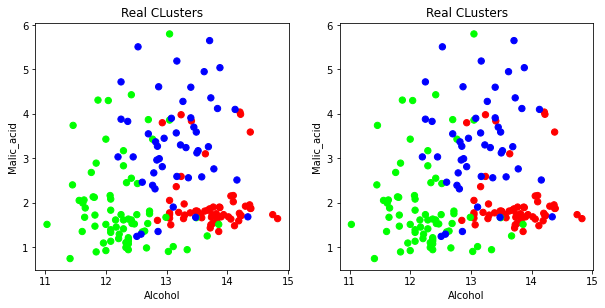

In [8]:
for i in range(3):
    cat = (clusters == i)
    labels[cat] = mode(wine.target[cat])[0]
    
acc = accuracy_score(wine.target,labels)
print('Accuracy = ',acc)

plt.figure(figsize =(10,10))
colormap = np.array(['red','lime','blue'])
plt.subplot(2,2,1)
plt.scatter(X.alcohol,X.malic_acid,c = colormap[y.Targets],s =40)
plt.title('Real CLusters')
plt.xlabel('Alcohol')
plt.ylabel('Malic_acid')

plt.subplot(2,2,2)
plt.scatter(X.alcohol,X.malic_acid,c = colormap[y.Targets],s =40)
plt.title('Real CLusters')
plt.xlabel('Alcohol')
plt.ylabel('Malic_acid')
plt.show()


In [9]:
from sklearn import preprocessing

In [14]:
xs = pd.DataFrame(scaler_X,columns = X.columns)

In [15]:
scaler = preprocessing.StandardScaler()
print(X)
scaler.fit(X)
scaler_X = scaler.transform(X)
print(scaler_X)


     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

Accuracy using gmm =  0.949438202247191


Text(0, 0.5, 'Malic acid')

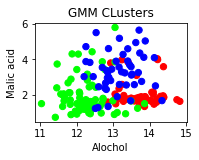

In [17]:
from sklearn.mixture import GaussianMixture 

gm = GaussianMixture(n_components=3)
gm.fit(xs)
gm_y = gm.predict(xs)

labels = np.zeros_like(clusters)

for i in range(3):
    cat = (gm_y == i)
    labels[cat] = mode(wine.target[cat])[0]
acc = accuracy_score(wine.target,labels)
print('Accuracy using gmm = ',acc)

plt.subplot(2,2,3)
plt.scatter(X.alcohol,X.malic_acid,c = colormap[y.Targets],s =40)
plt.title('GMM CLusters')
plt.xlabel('Alochol')
plt.ylabel('Malic acid')

